In [2]:
# set up imports
import numpy as np
import torch
import statsmodels.nonparametric.smoothers_lowess
import matplotlib.pyplot as plt
%matplotlib inline

from behavior_model_fitting.helpers.policy import softmax, pick_action 
from behavior_model_fitting.tasks.BernoulliBandit import BernoulliBandit

In [ ]:
# task params
prob = [0.7]
ntrials = 100

In [41]:
# per subject params
beta = 0.5
lr = 0.1
q = torch.as_tensor([0., 0.])

In [42]:
# init
resp = np.zeros(ntrials)
reward = np.zeros(ntrials)
correct = np.zeros(ntrials)

task = BernoulliBandit(seed=0, probs=prob)
outcomes = task.sample(num_episodes=ntrials)

In [43]:
# generate samples for a given subject
for trial in range(ntrials):
    probs = softmax(q, beta)
    resp[trial] = pick_action(probs)
    action = resp[trial].astype('int')
    reward[trial] = outcomes[trial][action]
    correct[trial] = (reward[trial] == 1.)
    q[action] = q[action] + lr*(reward[trial]-q[action])

In [44]:
blocksize=5
nblocks=int(ntrials/blocksize)
block_reward=np.zeros(nblocks)
for i in range(nblocks):
    block_trials=np.arange(i*blocksize,(i+1)*blocksize)
    block_reward[i]=np.mean(correct[block_trials]==1)

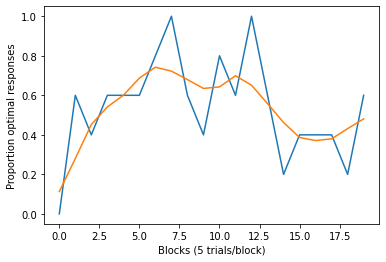

In [45]:
plt.plot(block_reward)
smooth=statsmodels.nonparametric.smoothers_lowess.lowess(block_reward,np.arange(block_reward.shape[0]),frac=0.33)
plt.plot(smooth[:,1])
plt.xlabel('Blocks (%d trials/block)'%blocksize)
plt.ylabel('Proportion optimal responses')
plt.show()